Using TensorFlow backend.
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python

11493376/11490434 [==============================] - 1s 0us/step


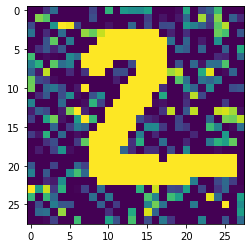

In [5]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential


%matplotlib inline
import pylab as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [6]:
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))


In [7]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

W0224 10:26:46.595208 140028110419456 deprecation_wrapper.py:119] From /home/ishanu/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [8]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

NameError: name 'autoencoder' is not defined

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=50,
                batch_size=256,
                validation_data=(x_test_noisy, x_test_noisy))

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (60000, 784)

In [7]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#encoded = Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
#decoder = Model(encoded_input, x)

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))

print x_test_noisy.shape

(60000, 784)
(10000, 784)
(10000, 784)


In [13]:
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.5886 - val_loss: 0.5669
Epoch 2/25
60000/60000 [==============================] - 2s 37us/step - loss: 0.5636 - val_loss: 0.5557
Epoch 3/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.5491 - val_loss: 0.5398
Epoch 4/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.5346 - val_loss: 0.5266
Epoch 5/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.5231 - val_loss: 0.5170
Epoch 6/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.5152 - val_loss: 0.5104
Epoch 7/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.5096 - val_loss: 0.5056
Epoch 8/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.5052 - val_loss: 0.5016
Epoch 9/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.5015 - val_loss: 0.4981
Epoch

In [14]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

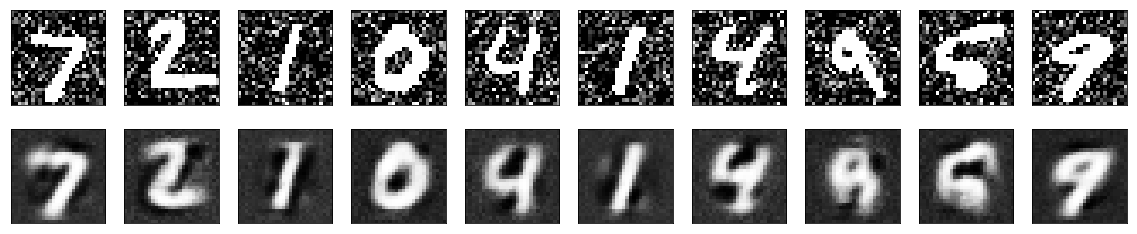

In [16]:
%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [17]:
! pwd

/home/ishanu/ZED/Research/CCTS40500_/notebooks
